In [10]:
%load_ext autoreload
%autoreload 2
import pytest
import numpy as np
import intake
from cmip6_preprocessing.preprocessing import combined_preprocessing
col = intake.open_esm_datastore(
        "https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"
    )
cat = col.search(
    source_id="MPI-ESM1-2-HR",
    experiment_id="historical",
    variable_id="o2",
    table_id="Omon",
    member_id="r1i1p1f1",
)
print(cat.df)
ddict = cat.to_dataset_dict(
    zarr_kwargs={"consolidated": True}, preprocess=None
)
ds = ddict["CMIP.MPI-M.MPI-ESM1-2-HR.historical.Omon.gn"]
# check all dims for duplicates
# for di in ds.dims:
#     try:
#         assert len(ds[di]) == len(np.unique(ds[di]))
#     except:
#         print(di)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
  activity_id institution_id      source_id experiment_id member_id table_id  \
0        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   

  variable_id grid_label                                             zstore  \
0          o2         gn  gs://cmip6/CMIP/MPI-M/MPI-ESM1-2-HR/historical...   

   dcpp_init_year  
0             NaN  

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
                
--> There is/are 1 group(s)


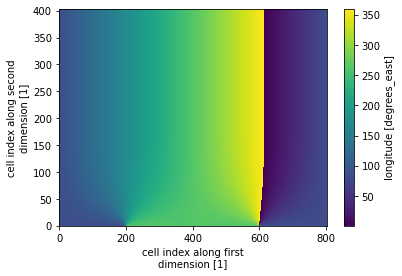

In [12]:
ds.longitude.plot()

In [7]:
assert len(ds.x) == len(np.unique())

<xarray.DataArray 'x' (x: 3)>
array([358.70388, 359.15388, 359.60388])
Coordinates:
  * x        (x) float64 358.7 359.2 359.6

In [8]:
np.interp()

<xarray.DataArray 'y' (y: 404)>
array([-78.674881, -78.283398, -77.891915, ...,  51.148879,  51.181034,
        51.245541])
Coordinates:
  * y        (y) float64 -78.67 -78.28 -77.89 -77.5 ... 51.12 51.15 51.18 51.25

In [ ]:
ds.x.diff('x').plot()

4182 iterations needed to fix non monotinic dim y
4183 iterations needed to fix non monotinic dim y
4184 iterations needed to fix non monotinic dim y
4185 iterations needed to fix non monotinic dim y
4186 iterations needed to fix non monotinic dim y
4187 iterations needed to fix non monotinic dim y
4188 iterations needed to fix non monotinic dim y

In [ ]:
ds.y.diff('y').plot()

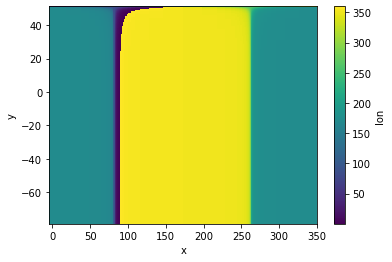

In [12]:
ds.lon.plot()